# Análisis dinámico (26/10/2023)

## Cobweb Process (Modelo de la Telaraña)
(créditos a Carrtesy)

### Modelaje
Paquetes necesarios para la sesión:
```python
matplotlib -> Gráficas
scipy -> Gráficas
numpy -> Operaciones algebraicas
pynverse -> Este paquete nos servirá para usar la función inversa de demanda (p en función de q)
```
(en caso de no contar con los paquetes necesarios, favor ejecutar el código que aparece a continuación)

In [ ]:
!pip install pynverse
!pip install matplotlib
!pip install numpy
!pip install scipy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pynverse import inversefunc # Este paquete nos da la función inversa

In [ ]:
def plotMarket(D, S, Q_max, P_max):
    plt.xlim(left = 0)
    plt.xlim(right = Q_max)
    plt.ylim(bottom = 0)
    plt.ylim(top = P_max)
    rangeP = np.linspace(0, P_max, P_max * 100)
    plt.plot(list(map(D, rangeP)), rangeP)
    plt.plot(list(map(S, rangeP)), rangeP)

def connectPoints(point1, point2):
    plt.plot([point1[0], point2[0]],[point1[1], point2[1]] , 'k-', linewidth = 1)
    
def cobwebProcess(D, S, S_adj, init_price, ϵ, periods):
    P = init_price
    S_inv = inversefunc(S)
    
    for i in range(periods):
        S_cur = [S(P), P]
        D_cur = [D(P), P]
        connectPoints(S_cur, D_cur)
        # El oferente está ajustando la cantidad ofertada de acuerdo a la demanda actual.
        Q = S_adjusting_function(D(P))
        P = S_inv(Q)    
        S_next = [Q, P]
        connectPoints(D_cur, S_next)
        
        # Si el mercado está cerca del equilibrio, parar la iteración
        if(abs(D(P) - S(P)) < ϵ):
            print("El mercado está en equilibrio.\n",\
                  "Iteración: ", i+1, "\n",\
                  "-ofeta\n",\
                  "P: ", P, "\n",\
                  "Q: ", S(P), "\n", \
                  "-Demandae\n",\
                  "P: ", P, "\n",\
                  "Q: ", D(P), "\n", \
                 )
            break
        
        # Si el mercado no logró alcanzar el equilibrio, reportarlo
        if((i == periods - 1) and (abs(D(P) - S(P)) >= ϵ)):
            print("La economía no fue capaz de alcanzar el equilibrio.\n",\
                  "-Supply side\n",\
                  "P: ", P, "\n",\
                  "Q: ", S(P), "\n", \
                  "-Demand side\n",\
                  "P: ", P, "\n",\
                  "Q: ", D(P), "\n", \
                 )

### Caso de estudio
Hagamos un análisis de caso

**Caso 1** : Hacia el equilibrio

$$ D: Q = 1 - P $$

$$ S: Q = P $$

$$ Adj: Q_{n+1} = D(Q_n) * 0.9 $$

$$ P_0 = 0 $$

In [ ]:
D = lambda P: 1-P
S = lambda P: P
S_adjusting_function = lambda Q: 0.9* Q
init_price = 0
Q_max = 1
P_max = 1

plotMarket(D, S, Q_max, P_max)
cobwebProcess(D, S, S_adjusting_function, init_price, 0.01, 100)
plt.show()

**Caso 2**: Equilibrio Inalcanzable

$$ D: Q = 1 - P $$

$$ S: Q = P $$

$$ Adj: Q_{n+1} = D(Q_n) * 0.6 $$

$$ P_0 = 0 $$

In [ ]:
D = lambda P: 1-P
S = lambda P: P
S_adjusting_function = lambda Q: 0.6 * Q
init_price = 0
Q_max = 1
P_max = 1

plotMarket(D, S, Q_max, P_max)
cobwebProcess(D, S, S_adjusting_function, init_price, 0.01, 100)
plt.show()

**Caso 3**: Oferta cuadrática

$$ D: Q = 100 - P $$

$$ S: Q = \frac{ P^2 }{100} $$

$$ Adj: Q_{n+1} = 0.9 * D(Q_n) $$

$$ P_0 = 0 $$

In [ ]:
D = lambda P: 100-P
S = lambda P: (P**2)/100
S_adjusting_function = lambda Q: 0.9 * Q
init_price = 0
Q_max = 100
P_max = 100

plotMarket(D, S, Q_max, P_max)
cobwebProcess(D, S, S_adjusting_function, init_price, 1, 100)
plt.show()

**Caso 4**: Oferta cuadrática

$$ D: Q = 100 - P $$

$$ S: Q = \frac{ P^2 }{100} $$

$$ Adj: Q_{n+1} = 0.9 * D(Q_n) $$

$$ P_0 = 0 $$

In [ ]:
D = lambda P: 1-P
S = lambda P: P
D_inv = inversefunc(D)
S_inv = inversefunc(S)

S_adjusting_function = lambda Q: 0.8 * Q if S(D_inv(Q)) < Q else 1.2 * Q
init_price = 0
Q_max = 1
P_max = 1

plotMarket(D, S, Q_max, P_max)
cobwebProcess(D, S, S_adjusting_function, init_price, 0.01, 100)
plt.show()

## Modelo de interacción de multiplicador con acelerador de Samuelson

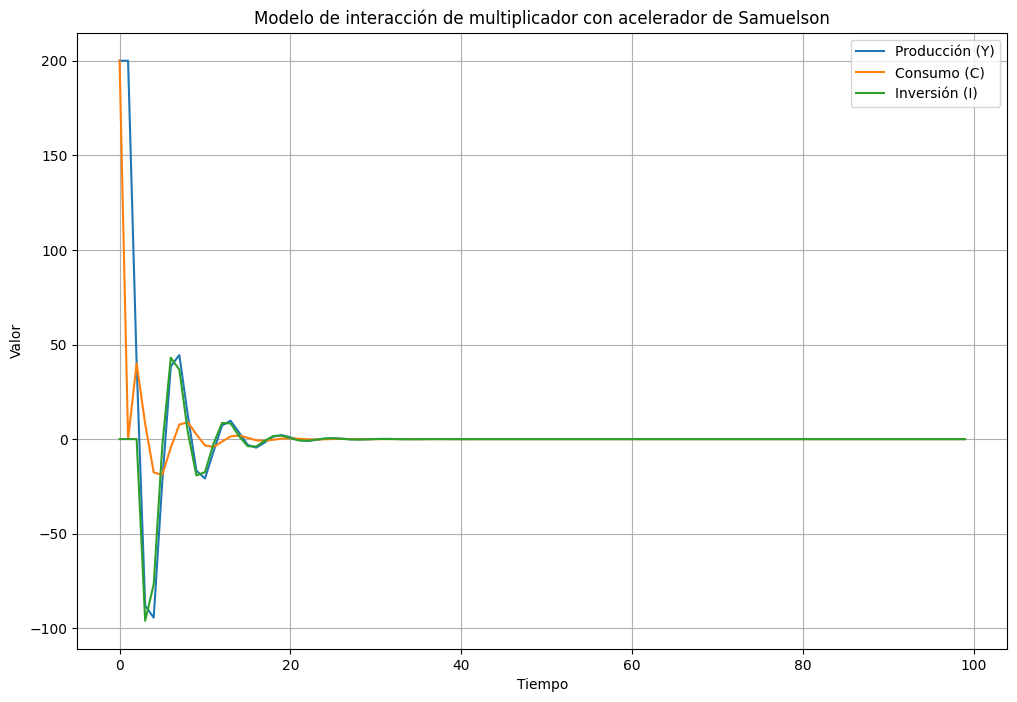

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
alpha = 0.6  # coeficiente del acelerador
beta = 0.2  # coeficiente del multiplicador
T = 100  # períodos de tiempo

# Inicializar arrays (lista de elementos)
Y = np.zeros(T)  # producción
I = np.zeros(T)  # inversión
C = np.zeros(T)  # consumo

# Condiciones iniciales
Y[0] = Y[1] = 200
C[0] = Y[0] - I[0]

for t in range(2, T):
    I[t] = alpha * (Y[t-1] - Y[t-2])  # acelerador
    C[t] = beta * Y[t-1]  # multiplicador
    Y[t] = C[t] + I[t]

# Gráfico de la producción en función del tiempo
plt.figure(figsize=(12, 8))
plt.plot(Y, label='Producción (Y)')
plt.plot(C, label='Consumo (C)')
plt.plot(I, label='Inversión (I)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title("Modelo de interacción de multiplicador con acelerador de Samuelson")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
!pip install fredpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Steal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Curva de Phillips (Relación Inflación - Desempleo)

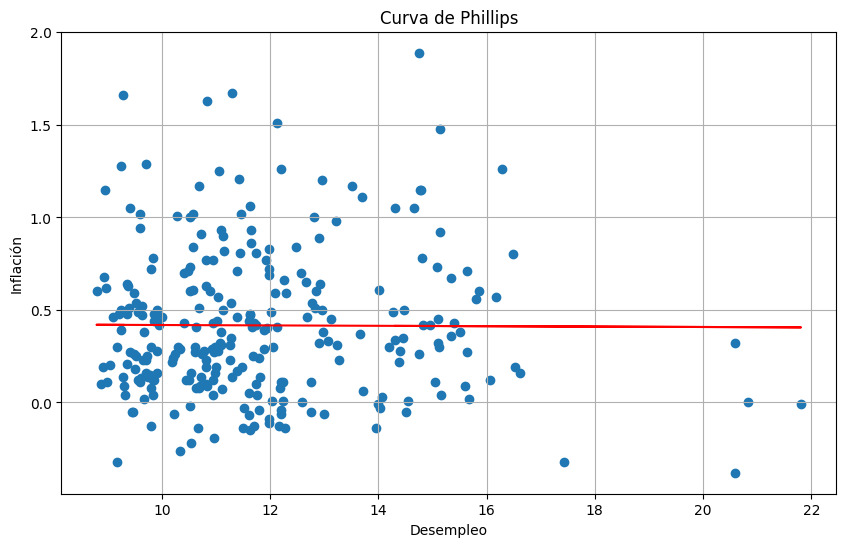

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_excel("Inflación - Desempleo.xlsx")
x = df[['Desempleo']]
y = df['Inflación']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(x, y)

# Obtener la línea de regresión (predicciones para y basadas en x)
y_pred = model.predict(x)

# Crear el gráfico
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Curva de Phillips')
plt.xlabel('Desempleo')
plt.ylabel('Inflación')
plt.grid(True)
plt.show()